In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")

In [ ]:
!pip install ts2vg
!pip install igraph
!pip install cairocffi
# !pip install pycairo
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.1 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=7ad0660a4969e725cec00bdcc9825adcbd10170a28994f3a345b6c7bf382f241
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.3 MB/s 


# Task 1
## Generate samples

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sub3_climbingdown.csv to sub3_climbingdown.csv
Saving sub2_walking.csv to sub2_walking.csv
Saving sub2_running.csv to sub2_running.csv
Saving sub2_climbingup.csv to sub2_climbingup.csv
Saving sub2_climbingdown.csv to sub2_climbingdown.csv
Saving sub3_walking.csv to sub3_walking.csv
Saving sub3_running.csv to sub3_running.csv
Saving sub3_climbingup.csv to sub3_climbingup.csv
Saving sub1_walking.csv to sub1_walking.csv
Saving sub1_running.csv to sub1_running.csv
Saving sub1_climbingup.csv to sub1_climbingup.csv
Saving sub1_climbingdown.csv to sub1_climbingdown.csv


In [ ]:
df11 = pd.read_csv('sub1_climbingdown.csv')
df12 = pd.read_csv('sub1_climbingup.csv')
df13 = pd.read_csv('sub1_running.csv')
df14 = pd.read_csv('sub1_walking.csv')
df21 = pd.read_csv('sub2_climbingdown.csv')
df22 = pd.read_csv('sub2_climbingup.csv')
df23 = pd.read_csv('sub2_running.csv')
df24 = pd.read_csv('sub2_walking.csv')
df31 = pd.read_csv('sub3_climbingdown.csv')
df32 = pd.read_csv('sub3_climbingup.csv')
df33 = pd.read_csv('sub3_running.csv')
df34 = pd.read_csv('sub3_walking.csv')

In [ ]:
# generate samples for each of the 3 subject
sub1_up = df11[1000:2023]
sub1_down = df12[1000:2023]
sub1_run = df13[1000:2023]
sub1_walk = df14[1000:2023]
sub2_up = df21[1000:2023]
sub2_down = df22[1000:2023]
sub2_run = df23[1000:2023]
sub2_walk = df24[1000:2023]
sub3_up = df31[1000:2023]
sub3_down = df32[1000:2023]
sub3_run = df33[1000:2023]
sub3_walk = df34[1000:2023]

In [ ]:
sub1_up.head()

,id,attr_time,attr_x,attr_y,attr_z
1000,1001,1435996988030,5.722142,4.464588,0.661997
1001,1002,1435996988050,6.258443,6.097433,1.148618
1002,1003,1435996988071,6.345831,7.076063,1.823185
1003,1004,1435996988089,6.412870,7.289746,1.948880
1004,1005,1435996988112,6.301539,6.783970,1.407192


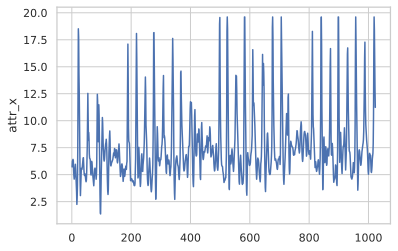

In [ ]:
# example: when climb up on x accelerometer direction
sns.lineplot(x=range(1, len(sub1_up['attr_x'])+1), y=sub1_up['attr_x'])

## Apply NVG & HVG
## Compute the average degree, network diameter, and average path length

In [ ]:
from networkx.algorithms.shortest_paths.weighted import all_pairs_bellman_ford_path_length
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import networkx as nx
import igraph as ig

def nvgplot(df, direction):
  ts = df[direction]
  g = NaturalVG()
  g.build(ts)
  ig_g = g.as_igraph()
  ad = np.mean(ig_g.degree())
  nd = ig_g.diameter()
  apl = ig_g.average_path_length()
  return ad, nd, apl

def hvgplot(df, direction):
  ts = df[direction]
  g = HorizontalVG()
  g.build(ts)
  ig_g = g.as_igraph()  
  ad = np.mean(ig_g.degree())
  nd = ig_g.diameter()
  apl = ig_g.average_path_length()
  return ad, nd, apl

## Tabulate all the results

In [ ]:
def table(dataframe, subject, activity):
  data = {'Method':['NVG', 'NVG', 'NVG', 'HVG', 'HVG', 'HVG'], 'Subject':np.array([subject]*6), 'Accelerometer axis':['X','Y','Z','X','Y','Z'], 
        'Activity':np.array([activity]*6)}
  df = pd.DataFrame(data)
  nvg_results = [nvgplot(dataframe, i) for i in ['attr_x', 'attr_y', 'attr_z']]
  hvg_results = [hvgplot(dataframe, i) for i in ['attr_x', 'attr_y', 'attr_z']]
  results = nvg_results + hvg_results
  df[['Average Degree', 'Network Diameter', 'Average Path Length']] = results
  return df

In [ ]:
df11 = table(sub1_up, 1, 'Climbing Up')
df12 = table(sub1_down, 1, 'Climbing Down')
df13 = table(sub1_run, 1, 'Running')
df14 = table(sub1_walk, 1, 'Walking')
df21 = table(sub2_up, 2, 'Climbing Up')
df22 = table(sub2_down, 2, 'Climbing Down')
df23 = table(sub2_run, 2, 'Running')
df24 = table(sub2_walk, 2, 'Walking')
df31 = table(sub3_up, 3, 'Climbing Up')
df32 = table(sub3_down, 3, 'Climbing Down')
df33 = table(sub3_run, 3, 'Running')
df34 = table(sub3_walk, 3, 'Walking')

In [ ]:
pd.set_option('display.max_rows', None)
final = pd.concat([df11, df12, df13, df14, df21, df22, df23, df24, df31, df32, df33, df34]).sort_values(by = ['Method', 'Subject'], ignore_index = True)
display(final)

,Method,Subject,Accelerometer axis,Activity,Average Degree,Network Diameter,Average Path Length
0,HVG,1,X,Climbing Up,3.953079,32.0,14.503381
1,HVG,1,Y,Climbing Up,3.947214,28.0,12.512563
2,HVG,1,Z,Climbing Up,3.968719,23.0,9.954478
3,HVG,1,X,Climbing Down,3.958944,35.0,15.405276
4,HVG,1,Y,Climbing Down,3.953079,32.0,14.368107
5,HVG,1,Z,Climbing Down,3.951124,30.0,11.057543
6,HVG,1,X,Running,3.955034,22.0,7.565514
7,HVG,1,Y,Running,3.833822,90.0,31.613823
8,HVG,1,Z,Running,3.966764,19.0,8.723984
9,HVG,1,X,Walking,3.960899,26.0,11.573290


## Generate scatter plots

### Walking & Running

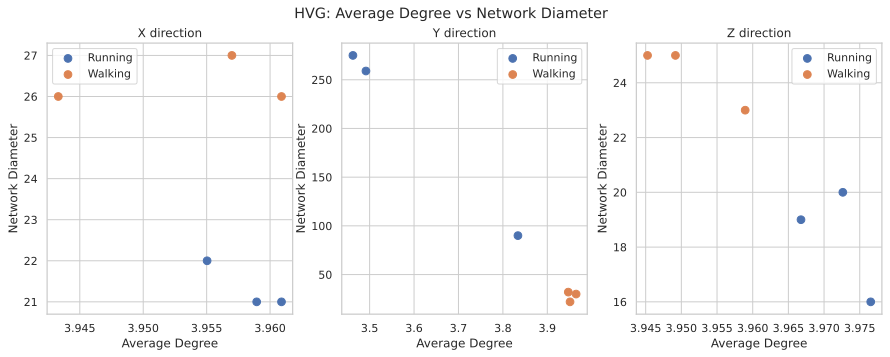

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')
groups = final.groupby(['Method', 'Activity', 'Accelerometer axis'])

for name, group in groups:
  if (name[0] == 'HVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
    
ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('HVG: Average Degree vs Network Diameter')
plt.show()

### Climbing Up & Climbing Down

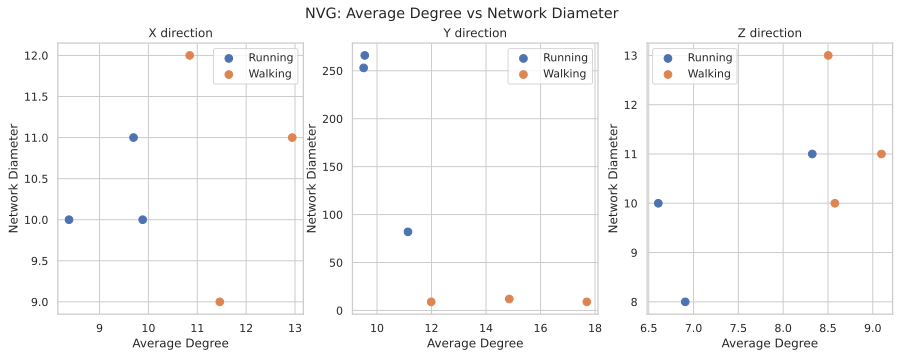

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')

for name, group in groups:
  if (name[0] == 'NVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])

ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('NVG: Average Degree vs Network Diameter')
plt.show()

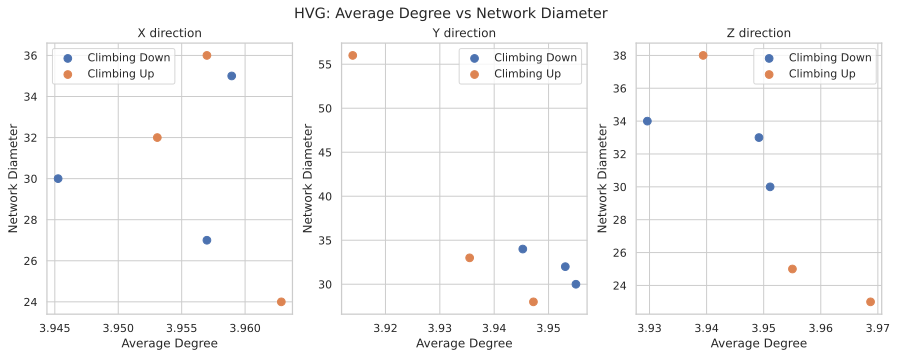

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')
for name, group in groups:
  if (name[0] == 'HVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])

ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('HVG: Average Degree vs Network Diameter')
plt.show()

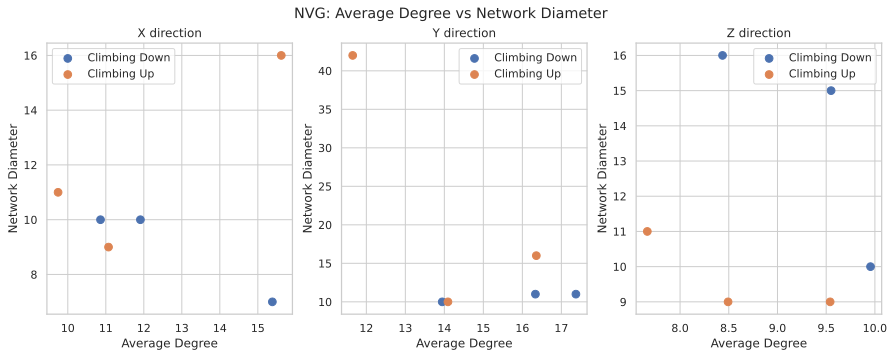

In [ ]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')
for name, group in groups:
  if (name[0] == 'NVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])

ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('NVG: Average Degree vs Network Diameter')
plt.show()

# Task 2

In [ ]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from warnings import filterwarnings
from pmdarima.arima import auto_arima

filterwarnings('ignore')

## 1. Get the unionned DataFrame

In [ ]:
# read the csv files, and change names of three columns mentioned  into shorter names
df_2020 = pd.read_csv('2020_US_Region_Mobility_Report.csv')
df_2021 = pd.read_csv('2021_US_Region_Mobility_Report.csv')
df_2022 = pd.read_csv('2022_US_Region_Mobility_Report.csv')
df_2020 = df_2020.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy','workplaces_percent_change_from_baseline':'Work','residential_percent_change_from_baseline':'Residential'})
df_2021 = df_2021.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy','workplaces_percent_change_from_baseline':'Work','residential_percent_change_from_baseline':'Residential'})
df_2022 = df_2022.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy','workplaces_percent_change_from_baseline':'Work','residential_percent_change_from_baseline':'Residential'})

In [ ]:
# acquire 2020-2022 King County info
df_2020_KingCounty = df_2020[df_2020['sub_region_2']=='King County'][['date','Residential','Work','Grocery and Pharmacy']]

df_2021_KingCounty = df_2021[df_2021['sub_region_2']=='King County'][['date','Residential','Work','Grocery and Pharmacy']]

df_2022_KingCounty = df_2022[df_2022['sub_region_2']=='King County'][['date','Residential','Work','Grocery and Pharmacy']]


In [ ]:
# use concat func to combine three files into one
df_all = pd.concat([df_2020_KingCounty,df_2021_KingCounty,df_2022_KingCounty])
df_all = df_all.reset_index(drop=True)
df_all

,date,Residential,Work,Grocery and Pharmacy
0,2020-02-15,0.0,-3.0,-2.0
1,2020-02-16,-1.0,-2.0,1.0
2,2020-02-17,7.0,-40.0,4.0
3,2020-02-18,1.0,-8.0,2.0
4,2020-02-19,0.0,-7.0,2.0
...,...,...,...,...
969,2022-10-11,9.0,-40.0,-10.0
970,2022-10-12,9.0,-41.0,-10.0
971,2022-10-13,9.0,-41.0,-10.0
972,2022-10-14,9.0,-44.0,-9.0


## 2. Trim DataFrame

In [ ]:
# remove the months before April 2020
df_all = df_all[df_all['date']>='2020-04-01']
df_all['date'] = pd.to_datetime(df_all['date'])
df_all

,date,Residential,Work,Grocery and Pharmacy
46,2020-04-01,29.0,-70.0,-20.0
47,2020-04-02,30.0,-70.0,-22.0
48,2020-04-03,31.0,-69.0,-21.0
49,2020-04-04,17.0,-48.0,-24.0
50,2020-04-05,15.0,-48.0,-29.0
...,...,...,...,...
969,2022-10-11,9.0,-40.0,-10.0
970,2022-10-12,9.0,-41.0,-10.0
971,2022-10-13,9.0,-41.0,-10.0
972,2022-10-14,9.0,-44.0,-9.0


## 3. Decomposition

In [ ]:
df_Residential = df_all[['date','Residential']].set_index('date')
df_Work = df_all[['date','Work']].set_index('date')
df_GP = df_all[['date','Grocery and Pharmacy']].set_index('date')

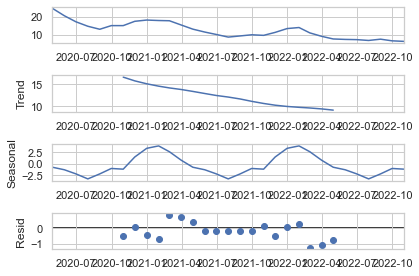

In [ ]:
# decomposition in an additive model
# put the data at a monthly cadence and fill in missing values
df_Residential = df_Residential.resample('M').mean().ffill()
res1 = seasonal_decompose(df_Residential,model='addtive')
res1.plot()
plt.show()

above graph performs that Residential continously decrease and its seasonal periods is about 12 months

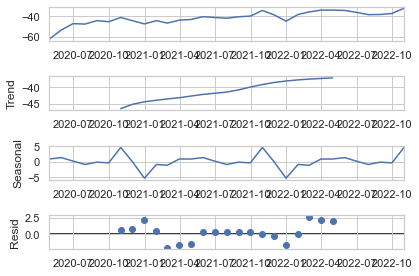

In [ ]:
df_Work = df_Work.resample('M').mean().ffill()
res2 = seasonal_decompose(df_Work,model='addtive')
res2.plot()
plt.show()

above graph performs that Work continously increase and its seasonal periods is about 12 months

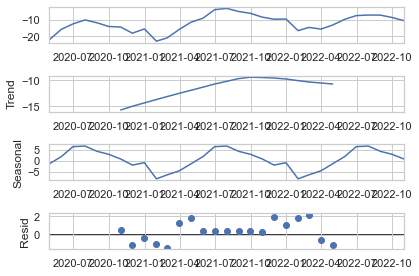

In [ ]:
df_GP = df_GP.resample('M').mean().ffill()
res3 = seasonal_decompose(df_GP,model='addtive')
res3.plot()
plt.show()

above graph performs that Grocery and Pharmacy continously increase until 10.2022 before having a slight drop and its seasonal periods is about 12 months

## 4. Exponential Smoothing & ARIMA

In [ ]:
Residential = df_all[['date','Residential']].reset_index(drop=True)
Work = df_all[['date','Work']].reset_index(drop=True)
GP = df_all[['date','Grocery and Pharmacy']].reset_index(drop=True)

display(Residential.tail())

,date,Residential
923,2022-10-11,9.0
924,2022-10-12,9.0
925,2022-10-13,9.0
926,2022-10-14,9.0
927,2022-10-15,1.0


Before we get into the models themselves, split this into a train/test set.

In [ ]:
# get the train set and test set
Residential_train = Residential.set_index('date')
Residential_test = Residential.set_index('date')

Work_train = Work.set_index('date')
Work_test = Work.set_index('date')

GP_train = GP.set_index('date')
GP_test = GP.set_index('date')

In [ ]:
Residential_train = Residential_train.loc[:'2022-04-01']
Residential_test = Residential_test.loc['2022-04-02':]

Work_train = Work_train.loc[:'2022-04-01']
Work_test = Work_test.loc['2022-04-02':]

GP_train = GP_train.loc[:'2022-04-01']
GP_test = GP_test.loc['2022-04-02':]

l = len(Residential_test)

Create the plot_train function to build several ES models and plot raw data, Simple ES, Trend ES, Dampened ES, Seasonal ES, Seasonal + Trend ES and Seasonal + Dampened trend ES in one graph, and further to compare.

In [ ]:
def plot_train(dataframe:pd.DataFrame,ts_column:str):
    df = dataframe.copy()
    # Simple ES: without considering trend or dampening
    simple_es = SimpleExpSmoothing(df[ts_column])
    df['Simple_ES'] = simple_es.fit(smoothing_level=0.2).fittedvalues

    # more complicated Exponential Smoothing
    # trend_only
    trend_es = ExponentialSmoothing(df[ts_column], trend = 'add')
    df['Trend_ES'] = trend_es.fit().fittedvalues

    # Dampened trend
    dampened_es = ExponentialSmoothing(df[ts_column], trend = 'add', damped_trend = True)
    df['Dampened_ES'] = dampened_es.fit().fittedvalues

    # seasonal_only
    seasonal_es = ExponentialSmoothing(df[ts_column], seasonal = "add")
    df['Seasonal_ES'] = seasonal_es.fit().fittedvalues
    
    # seasonal + trend
    seatrd_es = ExponentialSmoothing(df[ts_column], trend = "add", seasonal = "add")
    df['Seasonal+Trend_ES'] = seatrd_es.fit().fittedvalues
    
    # seasonal + dampend trend
    seadap_es = ExponentialSmoothing(df[ts_column], trend = "add", damped_trend = True, seasonal = "add")
    df['Seasonal+DampendTrend_ES'] = seadap_es.fit().fittedvalues
    
    column_list_ES = ['Simple_ES','Trend_ES','Dampened_ES','Seasonal_ES','Seasonal+Trend_ES','Seasonal+DampendTrend_ES']
    df[['Simple_ES','Trend_ES','Dampened_ES','Seasonal_ES','Seasonal+Trend_ES','Seasonal+DampendTrend_ES']][:'2022-04-01'].plot(figsize=(20,10))
    
    return simple_es, trend_es, dampened_es, seasonal_es, seatrd_es, seadap_es, column_list_ES


Define a function to evaluate the models.

In [ ]:
def score_all_metrics(data: pd.DataFrame, col_names: list,ts_col):
    """Score a set of predictions on all metrics"""

    mae = []
    rmse = []
    mape = []

    for col in col_names:
        mae.append(mean_absolute_error(data[ts_col], data[col]))
        rmse.append(mean_squared_error(data[ts_col], data[col], squared=False))
        mape.append(mean_absolute_percentage_error(data[ts_col], data[col]))

    results_df = pd.DataFrame({
        "ModelName": col_names,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape
    })

    return results_df

Define a function to build 4 kinds of ARIMA models.

In [ ]:
def plot_Arima(df:pd.DataFrame,ts_col):
    ar_1 = ARIMA(df[ts_col],order=(1,0,0))
    ma_1 = ARIMA(df[ts_col], order=(0,0,1))
    arima_1 = ARIMA(df[ts_col], order=(1,1,1))
    sarima = ARIMA(df[ts_col], order=(1,1,1), seasonal_order=(1,1,1,12))
    
    df["AR(1)"] = ar_1.fit().fittedvalues
    df["MA(1)"] = ma_1.fit().fittedvalues
    df["ARIMA(1,1,1)"] = arima_1.fit().fittedvalues
    df["SARIMA(1,1,1)"] = sarima.fit().fittedvalues

    column_list_ARIMA = ["AR(1)","MA(1)","ARIMA(1,1,1)","SARIMA(1,1,1)"]
    
    df[[ts_col,"AR(1)","MA(1)","ARIMA(1,1,1)","SARIMA(1,1,1)"]][:'2022-04-01'].plot(figsize=(20,10))
    plt.show()
    
    return ar_1,ma_1,arima_1,sarima,column_list_ARIMA 

### Residential

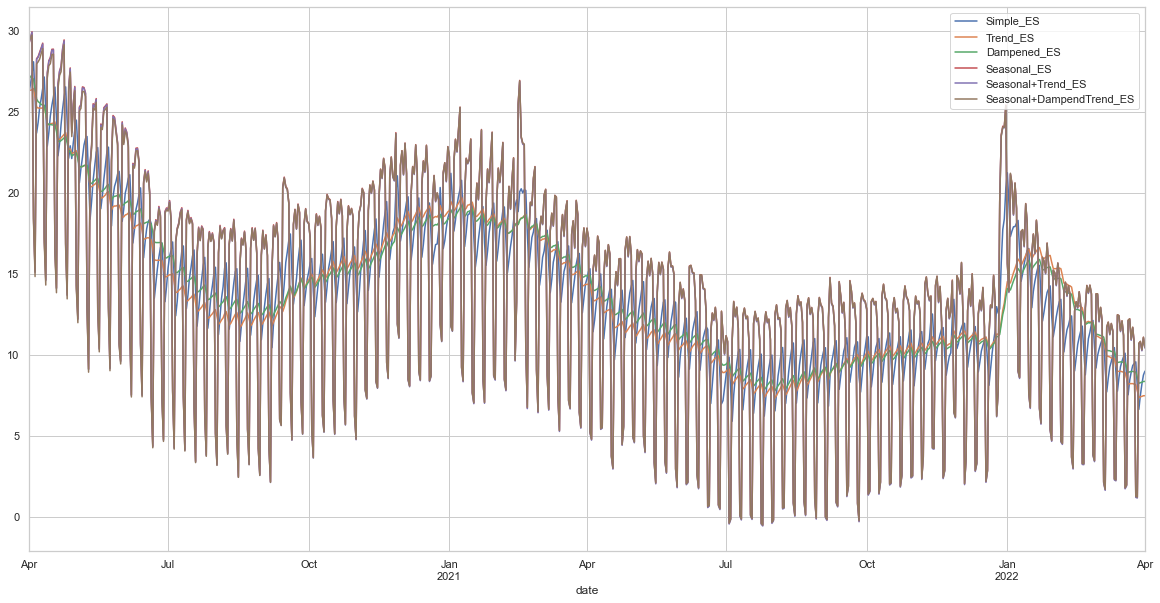

In [ ]:
simple_es,trend_es,dampened_es,seasonal_es,seatrd_es,seadap_es,column_list_ES = plot_train(Residential_train,'Residential')

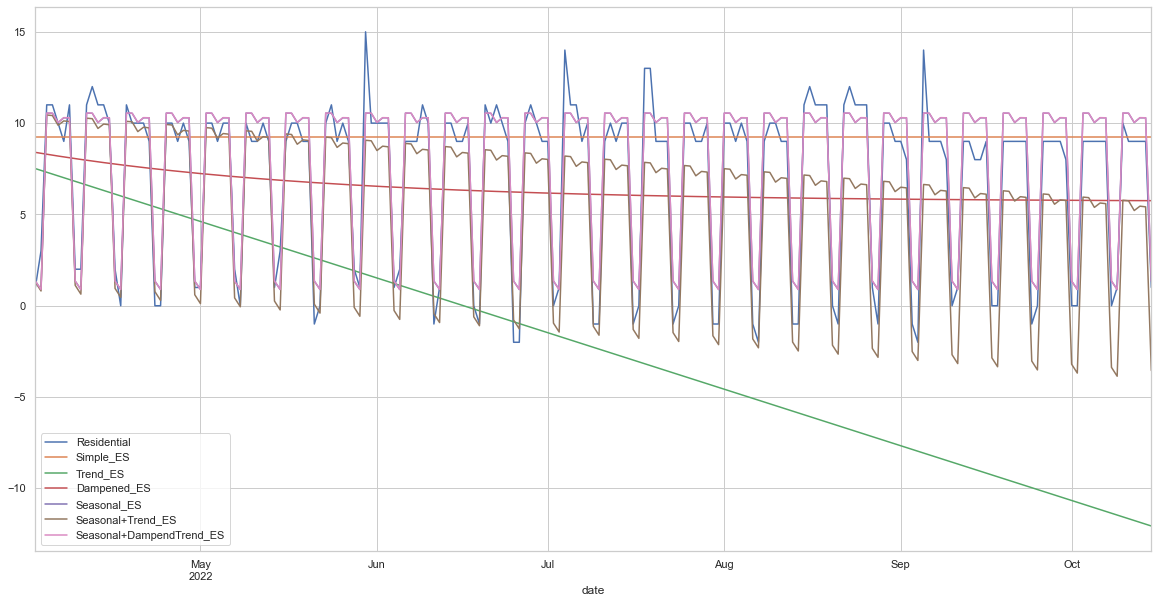

In [ ]:
Residential_test['Simple_ES'] = simple_es.fit(smoothing_level=0.2).forecast(l)
Residential_test['Trend_ES'] = trend_es.fit().forecast(l)
Residential_test['Dampened_ES'] = dampened_es.fit().forecast(l)
Residential_test['Seasonal_ES']  = seasonal_es.fit().forecast(l)
Residential_test['Seasonal+Trend_ES']  = seatrd_es.fit().forecast(l)
Residential_test['Seasonal+DampendTrend_ES']  = seadap_es.fit().forecast(l)

Residential_test.plot(figsize=(20,10))
plt.show()

In [ ]:
exp_smooth_scores = score_all_metrics(Residential_test, column_list_ES, 'Residential')
cm = sns.color_palette("vlag", as_cmap=True)
exp_smooth_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,Simple_ES,3.270361,5.066903,3582567214358332.500000
1,Trend_ES,9.992222,11.665700,2475507114535192.500000
2,Dampened_ES,4.280131,4.621823,2453278944474769.000000
3,Seasonal_ES,1.107365,1.344165,430209605070989.875000
4,Seasonal+Trend_ES,1.919938,2.380002,733892740974120.625000
5,Seasonal+DampendTrend_ES,1.109576,1.345635,430500175573754.000000


According to the table, we can see MAE, RMSE & MAPE of Seasonal_ES model are lowest, so the Seasonal_ES model is the best model among these ES models for residential dataset.

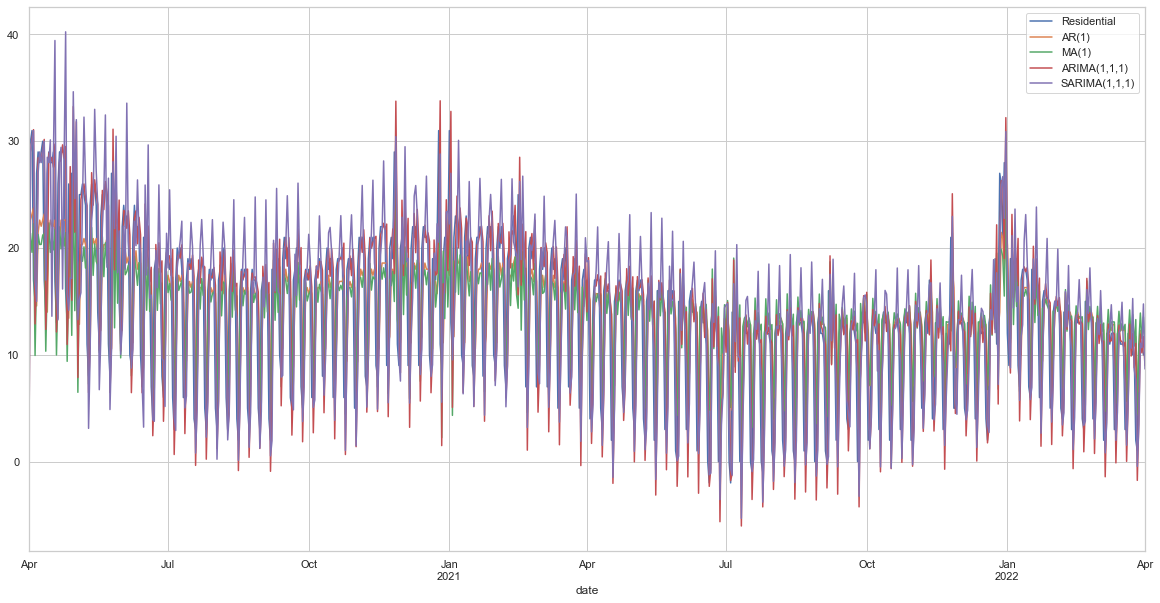

In [ ]:
ar_1,ma_1,arima_1,sarima,column_list_ARIMA = plot_Arima(df = Residential_train,ts_col = 'Residential')

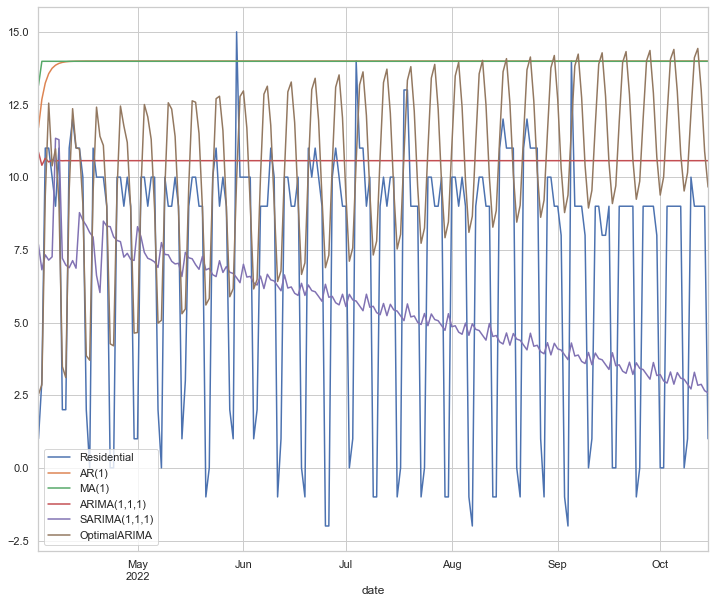

In [ ]:
Residential_test["AR(1)"] = ar_1.fit().forecast(l)
Residential_test["MA(1)"] = ma_1.fit().forecast(l)
Residential_test["ARIMA(1,1,1)"] = arima_1.fit().forecast(l)
Residential_test["SARIMA(1,1,1)"] = sarima.fit().forecast(l)

model = auto_arima(Residential_train['Residential'], start_p=0,start_q=0,max_p=6,max_q=6,
                       max_d=2,seasonal=True,test='adf',error_action='ignore',information_criterion='aic',
                      njob=-1,Trace=True,suppress_warnings=True)
model.fit(Residential_train['Residential'])
forecast = model.predict(n_periods=l)
Residential_test["OptimalARIMA"]=forecast

Residential_test[["Residential","AR(1)","MA(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(12,10))
plt.show()

In [ ]:
column_list_ARIMA.append('OptimalARIMA')
arima_scores = score_all_metrics(Residential_test, column_list_ARIMA,'Residential')

cm = sns.color_palette("vlag", as_cmap=True)
arima_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,AR(1),6.958377,8.308000,5439240084018940.000000
1,MA(1),6.971516,8.321606,5435248673494127.000000
2,"ARIMA(1,1,1)",3.851522,5.782441,4106612525611534.500000
3,"SARIMA(1,1,1)",4.658524,4.977976,2065468086815825.750000
4,OptimalARIMA,3.713663,4.729512,2927937040323818.500000


Obviously, Optimal ARIMA model is the best. Then we compare the Seasonal ES and optimal ARIMA model.

In [ ]:
comparison_scores = score_all_metrics(Residential_test,['Seasonal_ES','OptimalARIMA'],'Residential')
cm = sns.color_palette("vlag", as_cmap=True)
comparison_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,Seasonal_ES,1.107365,1.344165,430209605070989.875000
1,OptimalARIMA,3.713663,4.729512,2927937040323818.500000


According to the final comparison, for residential dataset, we should choose the Seasonal_ES model to predict the future value.

### Work

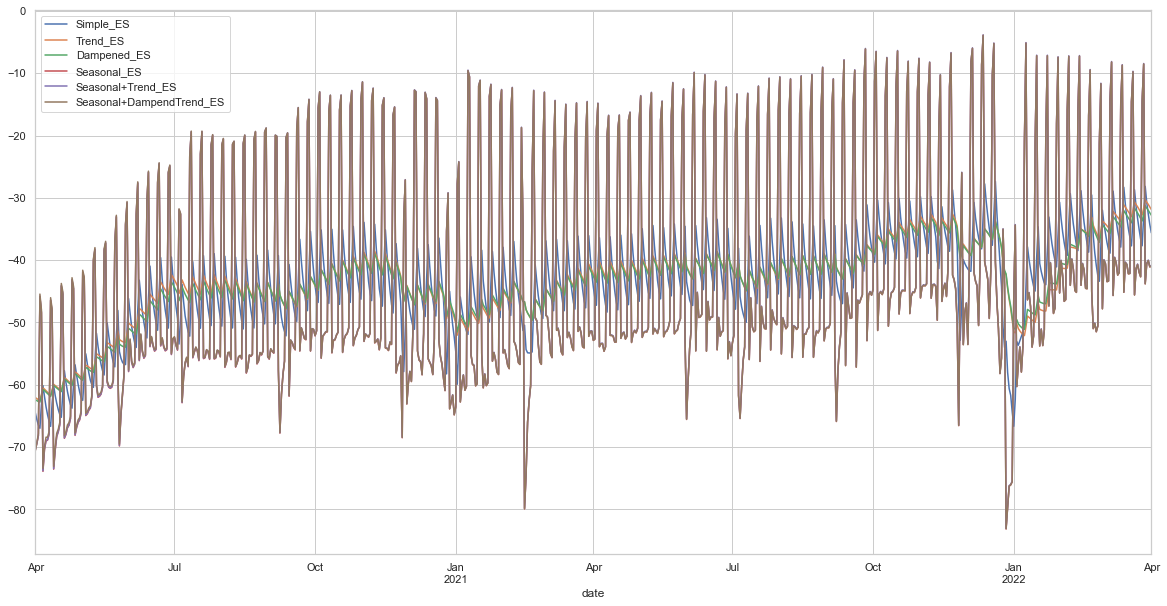

In [ ]:
simple_es,trend_es,dampened_es,seasonal_es,seatrd_es,seadap_es,column_list_ES = plot_train(Work_train,'Work')

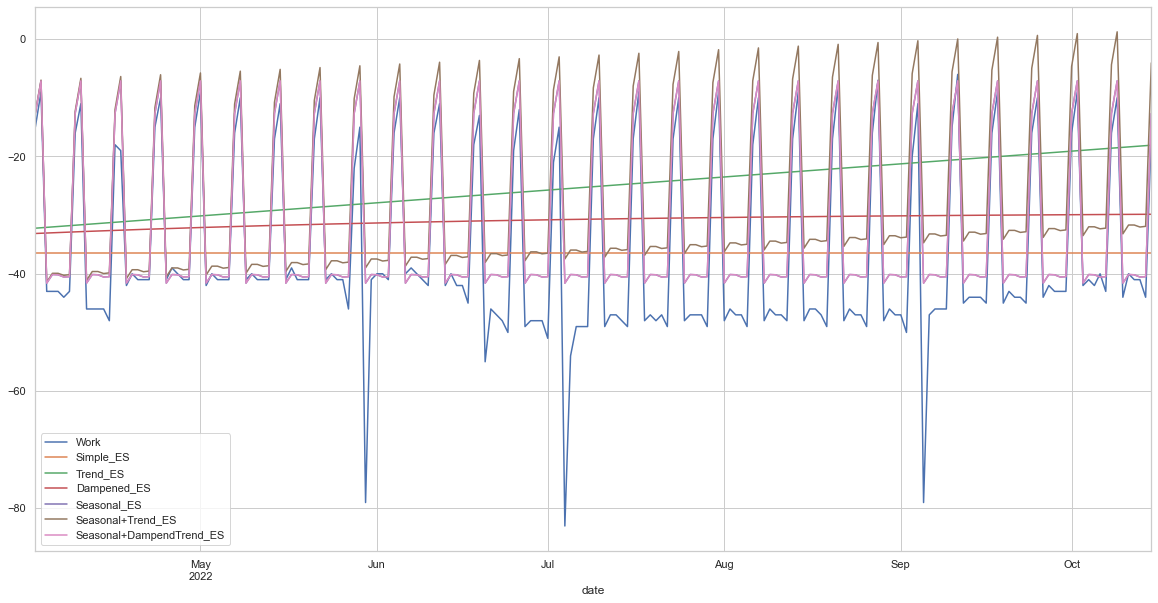

In [ ]:
Work_test['Simple_ES'] = simple_es.fit(smoothing_level = 0.2).forecast(l)
Work_test['Trend_ES'] = trend_es.fit().forecast(l)
Work_test['Dampened_ES'] = dampened_es.fit().forecast(l)
Work_test['Seasonal_ES']  = seasonal_es.fit().forecast(l)
Work_test['Seasonal+Trend_ES']  = seatrd_es.fit().forecast(l)
Work_test['Seasonal+DampendTrend_ES']  = seadap_es.fit().forecast(l)

Work_test.plot(figsize=(20,10))
plt.show()

In [ ]:
exp_smooth_scores = score_all_metrics(Work_test, column_list_ES,'Work')
cm = sns.color_palette("vlag", as_cmap=True)
exp_smooth_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,Simple_ES,12.853442,15.381829,0.683759
1,Trend_ES,17.681843,19.537519,0.598141
2,Dampened_ES,15.207733,16.342316,0.643264
3,Seasonal_ES,4.580390,6.895905,0.147170
4,Seasonal+Trend_ES,8.819598,10.699790,0.313473
5,Seasonal+DampendTrend_ES,4.582780,6.898050,0.147288


MAE, RMSE & MAPE of Seasonal_ES model are lowest, so the Seasonal_ES model is the best model for work dataset.

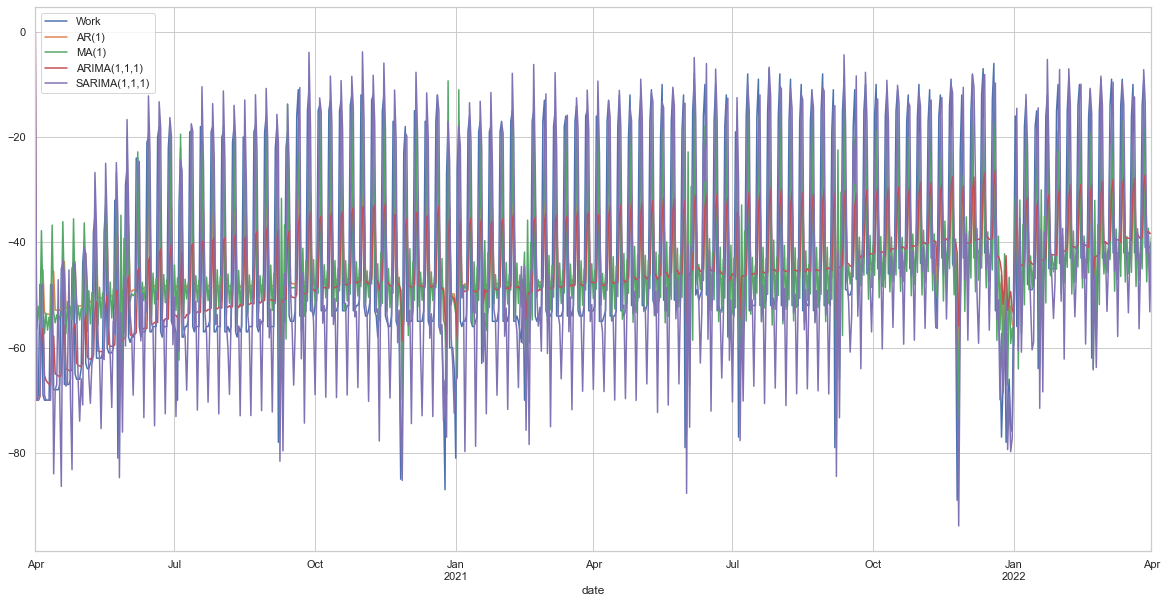

In [ ]:
ar_1,ma_1,arima_1,sarima,column_list_ARIMA = plot_Arima(df = Work_train,ts_col = 'Work')

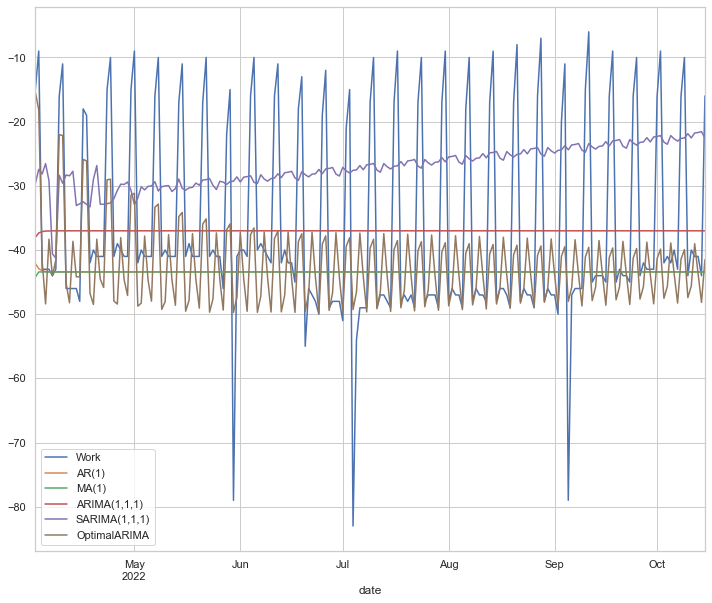

In [ ]:
model = auto_arima(Work_train['Work'], start_p=0,start_q=0,max_p=6,max_q=6,
                       max_d=2,seasonal=True,test='adf',error_action='ignore',information_criterion='aic',
                      njob=-1,Trace=True,suppress_warnings=True)
model.fit(Work_train['Work'])
forecast=model.predict(n_periods=l)
Work_test["OptimalARIMA"]=forecast

Work_test["AR(1)"] = ar_1.fit().forecast(l)
Work_test["MA(1)"] = ma_1.fit().forecast(l)
Work_test["ARIMA(1,1,1)"] = arima_1.fit().forecast(l)
Work_test["SARIMA(1,1,1)"] = sarima.fit().forecast(l)

Work_test[["Work","AR(1)","MA(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(12,10))
plt.show()

In [ ]:
column_list_ARIMA.append('OptimalARIMA')
arima_scores = score_all_metrics(Work_test, column_list_ARIMA,'Work')

cm = sns.color_palette("vlag", as_cmap=True)
arima_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,AR(1),11.281154,16.975968,0.766121
1,MA(1),11.296514,17.000216,0.767217
2,"ARIMA(1,1,1)",12.642837,15.410949,0.687972
3,"SARIMA(1,1,1)",16.816196,18.233031,0.611271
4,OptimalARIMA,9.809963,13.930469,0.618932


Optimal ARIMA is the best.

In [ ]:
comparison_scores = score_all_metrics(Work_test,['Seasonal_ES','OptimalARIMA'],'Work')
cm = sns.color_palette("vlag", as_cmap=True)
comparison_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,Seasonal_ES,4.580390,6.895905,0.147170
1,OptimalARIMA,9.809963,13.930469,0.618932


According to the final comparison, for Work dataset, we should choose the Seasonal_ES model to predict the future value.

### Grocery and Pharmacy

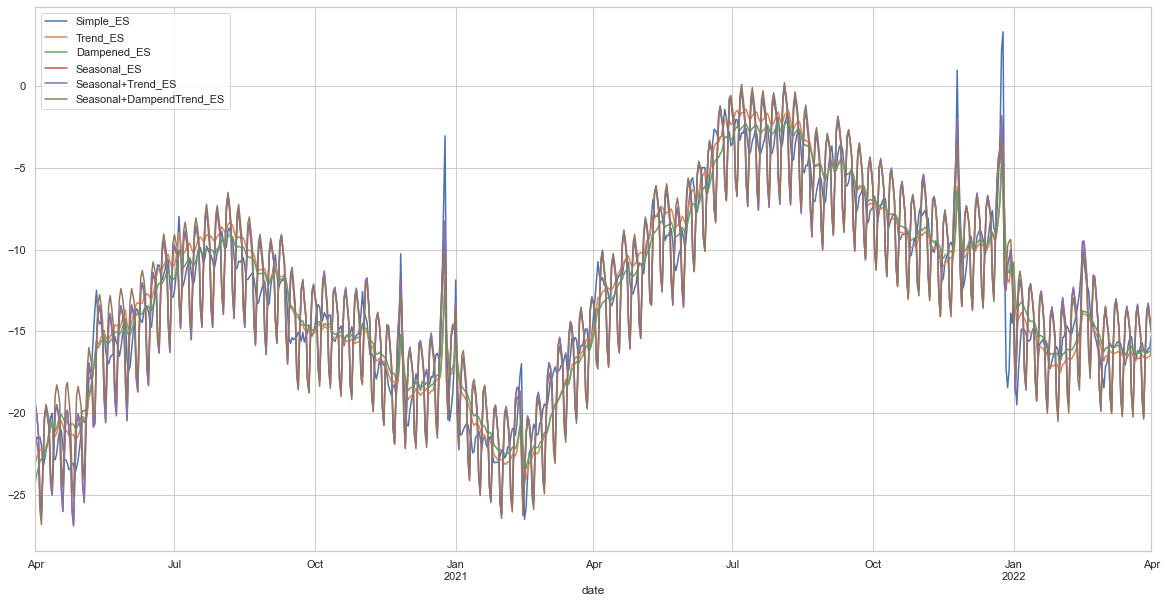

In [ ]:
simple_es,trend_es,dampened_es,seasonal_es,seatrd_es,seadap_es,column_list_ES = plot_train(GP_train,'Grocery and Pharmacy')

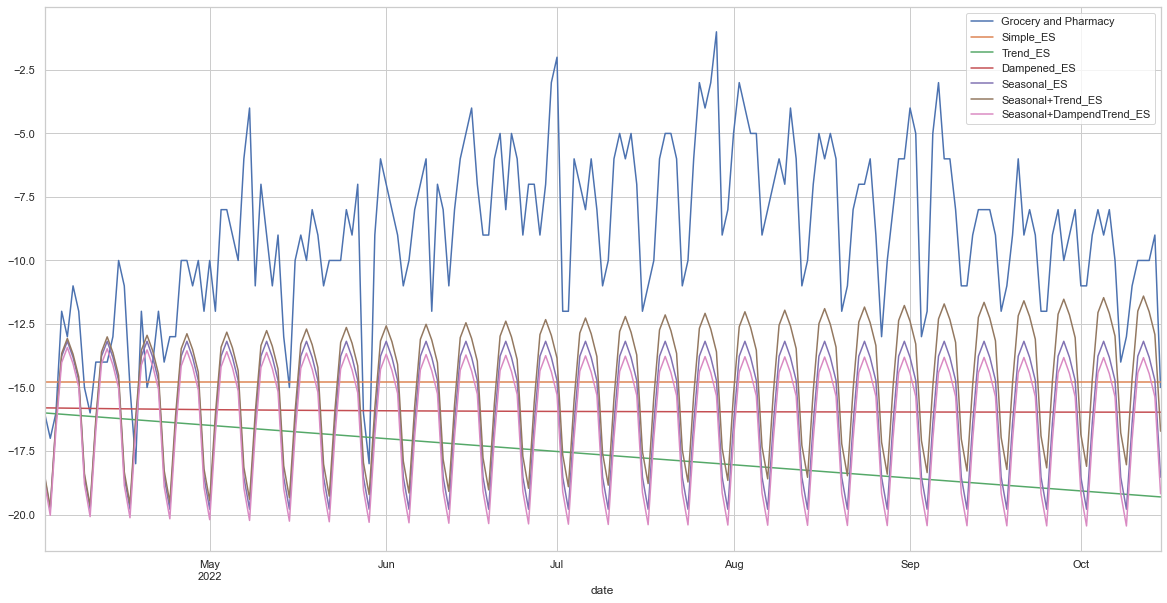

In [ ]:
GP_test['Simple_ES'] = simple_es.fit(smoothing_level=0.2).forecast(l)
GP_test['Trend_ES'] = trend_es.fit().forecast(l)
GP_test['Dampened_ES'] = dampened_es.fit().forecast(l)
GP_test['Seasonal_ES']  = seasonal_es.fit().forecast(l)
GP_test['Seasonal+Trend_ES']  = seatrd_es.fit().forecast(l)
GP_test['Seasonal+DampendTrend_ES']  = seadap_es.fit().forecast(l)

GP_test.plot(figsize=(20,10))
plt.show()

In [ ]:
exp_smooth_scores = score_all_metrics(GP_test, column_list_ES,'Grocery and Pharmacy')
cm = sns.color_palette("vlag", as_cmap=True)
exp_smooth_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,Simple_ES,5.954748,6.651657,0.984922
1,Trend_ES,8.717949,9.423105,1.375463
2,Dampened_ES,7.015698,7.683899,1.134163
3,Seasonal_ES,6.831581,7.389808,1.047762
4,Seasonal+Trend_ES,5.897030,6.474916,0.915275
5,Seasonal+DampendTrend_ES,7.358644,7.914145,1.121780


MAE, RMSE & MAPE of Seasonal+Trend_ES model are lowest, so the Seasonal+Trend_ES model is the best model for work dataset.

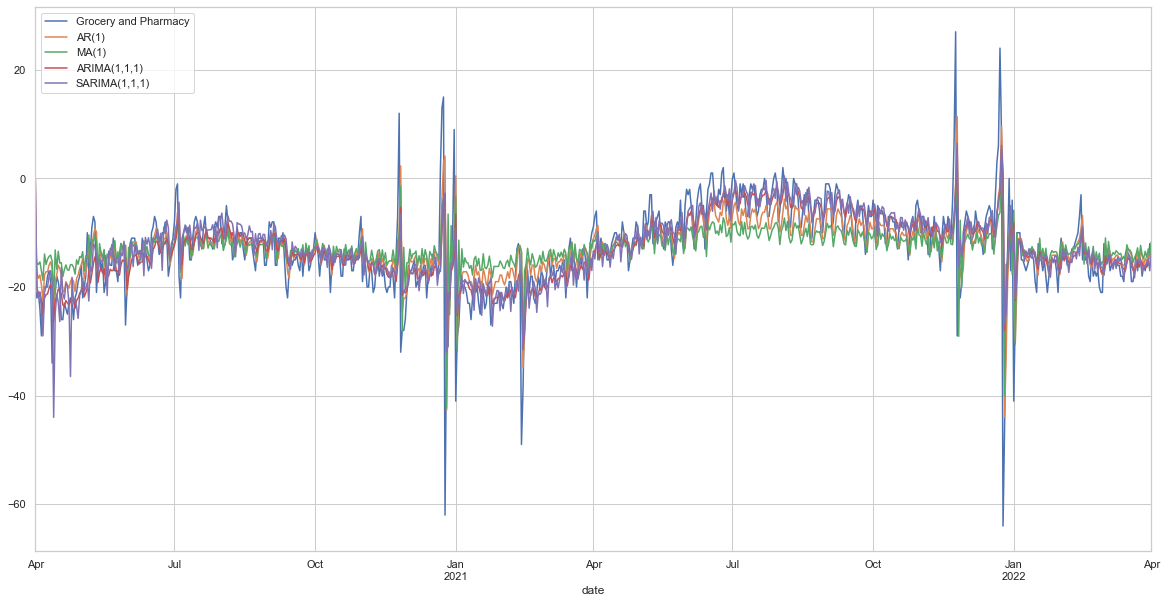

In [ ]:
ar_1,ma_1,arima_1,sarima,column_list_ARIMA = plot_Arima(df = GP_train,ts_col = 'Grocery and Pharmacy')

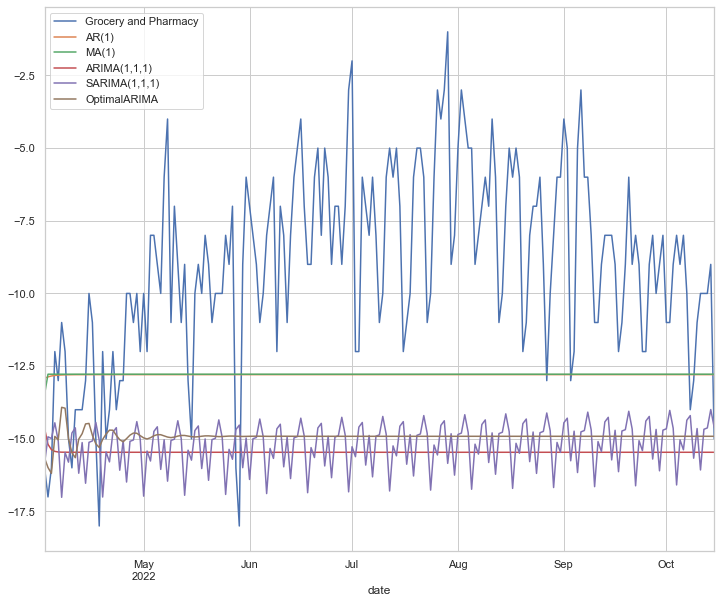

In [ ]:
model = auto_arima(GP_train['Grocery and Pharmacy'], start_p=0,start_q=0,max_p=6,max_q=6,
                       max_d=2,seasonal=True,test='adf',error_action='ignore',information_criterion='aic',
                      njob=-1,Trace=True,suppress_warnings=True)
model.fit(GP_train['Grocery and Pharmacy'])
forecast=model.predict(n_periods=l)
GP_test["OptimalARIMA"]=forecast

GP_test["AR(1)"] = ar_1.fit().forecast(l)
GP_test["MA(1)"] = ma_1.fit().forecast(l)
GP_test["ARIMA(1,1,1)"] = arima_1.fit().forecast(l)
GP_test["SARIMA(1,1,1)"] = sarima.fit().forecast(l)

GP_test[["Grocery and Pharmacy","AR(1)","MA(1)","ARIMA(1,1,1)","SARIMA(1,1,1)","OptimalARIMA"]].plot(figsize=(12,10))
plt.show()

In [ ]:
column_list_ARIMA.append('OptimalARIMA')
arima_scores = score_all_metrics(GP_test, column_list_ARIMA,'Grocery and Pharmacy')

cm = sns.color_palette("vlag", as_cmap=True)
arima_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,AR(1),4.298193,5.010320,0.740828
1,MA(1),4.285142,4.998085,0.738999
2,"ARIMA(1,1,1)",6.584084,7.256510,1.072965
3,"SARIMA(1,1,1)",6.365384,7.084720,1.044060
4,OptimalARIMA,6.042699,6.759310,0.999615


MA(1) is the best.

In [ ]:
comparison_scores = score_all_metrics(GP_test,['Seasonal+Trend_ES','MA(1)'],'Grocery and Pharmacy')
cm = sns.color_palette("vlag", as_cmap=True)
comparison_scores.style.background_gradient(cmap=cm)

,ModelName,MAE,RMSE,MAPE
0,Seasonal+Trend_ES,5.897030,6.474916,0.915275
1,MA(1),4.285142,4.998085,0.738999


According to the final comparison, for Work dataset, we should choose the MA(1) model to predict the future value.

## 5. Forecast

In [ ]:
df_index = pd.date_range('2022-10-16',periods=77)
Residential_Raw = Residential.set_index('date')
Seasonal_es = ExponentialSmoothing(Residential_Raw['Residential'],seasonal='add')
Residential_Forecast = Seasonal_es.fit().forecast(77)
Residential_Forecast = pd.DataFrame(data = Residential_Forecast)
Residential_Forecast.index.name = 'date'
Residential_Forecast

,0
date,
2022-10-16,0.127923
2022-10-17,10.254128
2022-10-18,10.022845
2022-10-19,9.722169
2022-10-20,9.680600
...,...
2022-12-27,10.022845
2022-12-28,9.722169
2022-12-29,9.680600


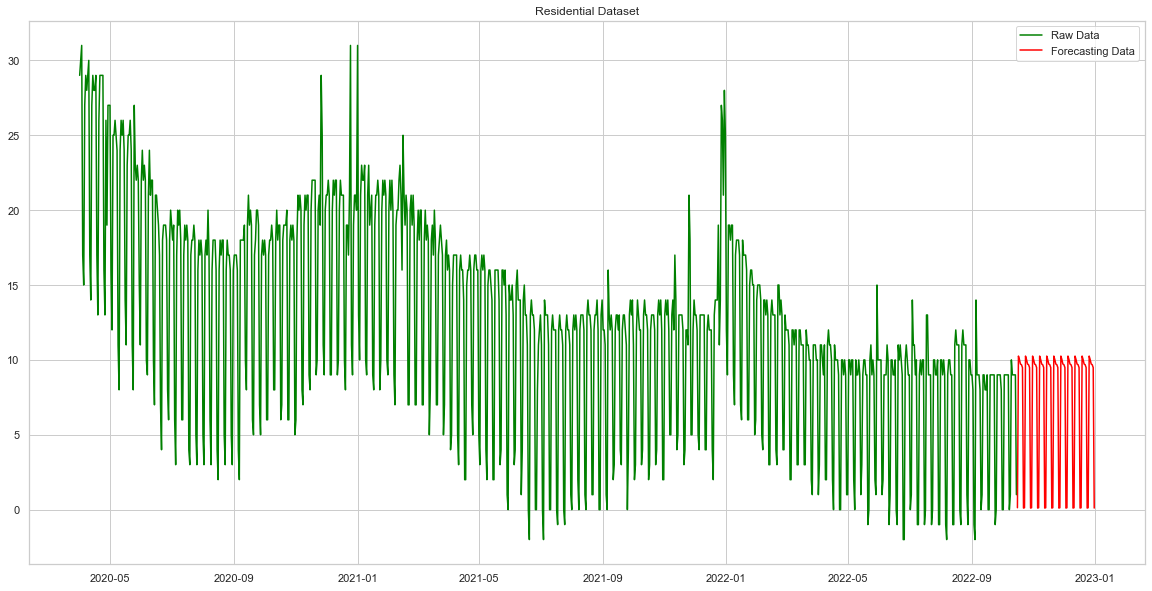

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(Residential_Raw, color = 'green', label = 'Raw Data')
plt.plot(Residential_Forecast, color = 'red', label = 'Forecasting Data')
plt.title('Residential Dataset')
plt.legend()
plt.show()

In [ ]:
Work_Raw = Work.set_index('date')
Seasonal_es = ExponentialSmoothing(Work_Raw['Work'],seasonal='add')
Work_Forecast = Seasonal_es.fit().forecast(77)
Work_Forecast = pd.DataFrame(data = Work_Forecast)
Work_Forecast.index.name = 'date'
Work_Forecast

,0
date,
2022-10-16,-7.211537
2022-10-17,-46.141896
2022-10-18,-42.284870
2022-10-19,-42.947056
2022-10-20,-42.626983
...,...
2022-12-27,-42.284870
2022-12-28,-42.947056
2022-12-29,-42.626983


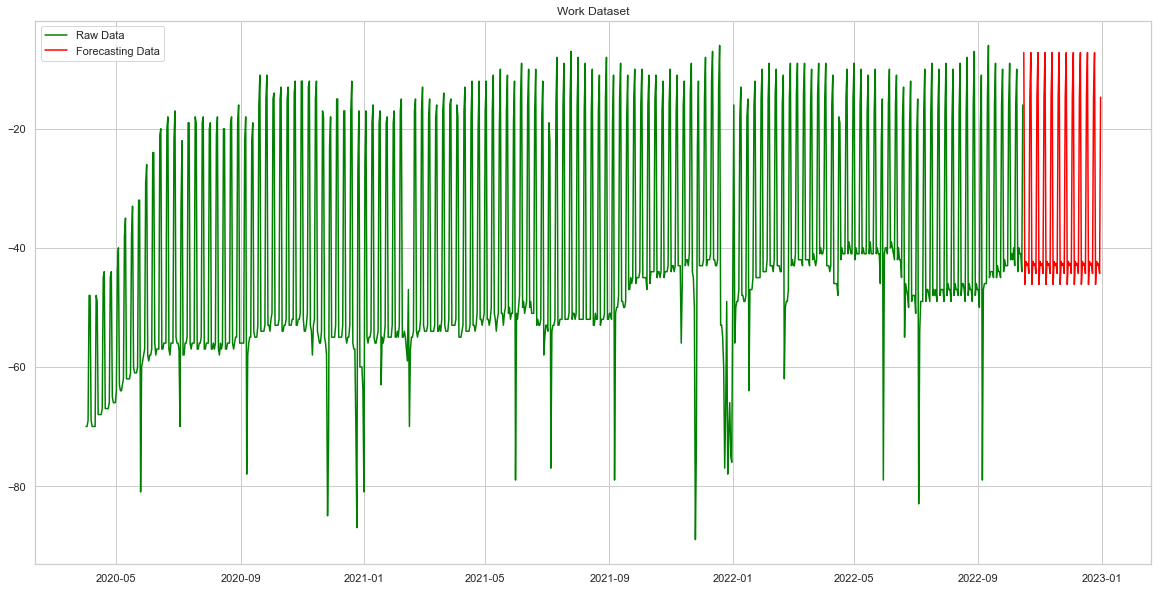

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(Work_Raw, color = 'green', label = 'Raw Data')
plt.plot(Work_Forecast, color = 'red', label = 'Forecasting Data')
plt.title('Work Dataset')
plt.legend()
plt.show()

In [ ]:
GP_Raw = GP.set_index('date')
ma_1 = ARIMA(GP_Raw['Grocery and Pharmacy'], order=(0,0,1))
GP_Forecast = ma_1.fit().forecast(77)
GP_Forecast = pd.DataFrame(data = GP_Forecast)
GP_Forecast.index.name = 'date'
GP_Forecast

,predicted_mean
date,
2022-10-16,-14.169816
2022-10-17,-11.974627
2022-10-18,-11.974627
2022-10-19,-11.974627
2022-10-20,-11.974627
...,...
2022-12-27,-11.974627
2022-12-28,-11.974627
2022-12-29,-11.974627


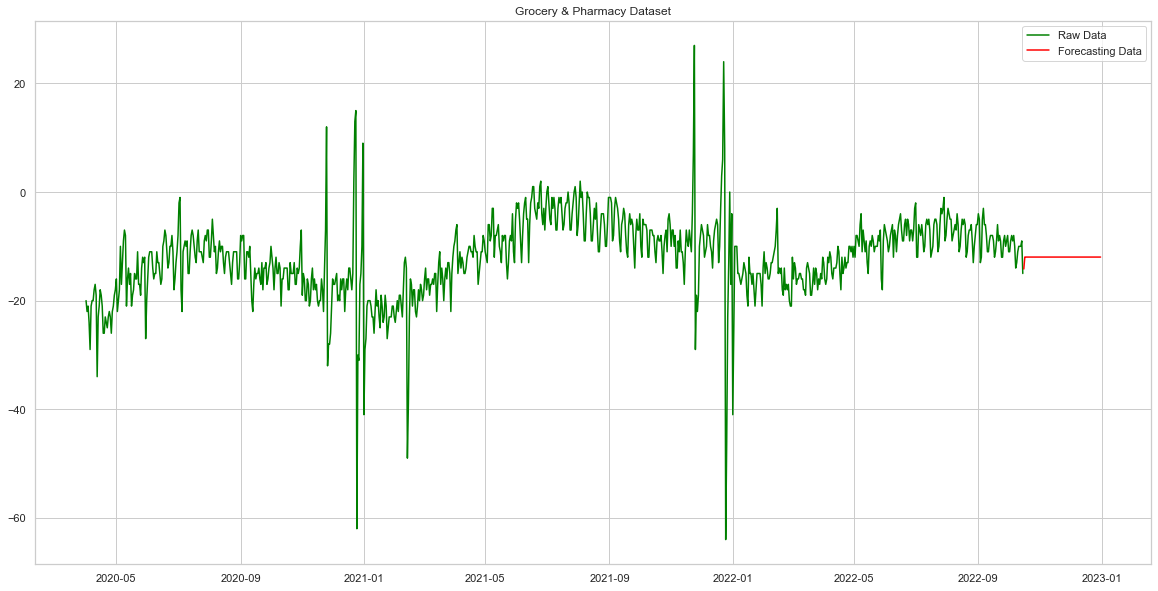

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(GP_Raw, color = 'green', label = 'Raw Data')
plt.plot(GP_Forecast, color = 'red', label = 'Forecasting Data')
plt.title('Grocery & Pharmacy Dataset')
plt.legend()
plt.show()